# Lab 05. Regression and Clustering


In this lab we will tackle two types of tasks: 
- Regression Competition
- Clustering practice


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab05_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab05_404_Sheipak_Sviat.ipynb`
    - `2022_lab05_M106_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab05_GroupNumber_Surname_Name`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2022-12-08 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/gqo8GmBMUBfRuw

## Part 1. Regression [7 points]

The task is to predict a price of a house sold in California based on some description of a house. Some columns give some information on the house itself (number of bedrooms, short written summary and so on) and some describe the neighborhood (middleschoolscore, middleschooldistance).

* Id column - `id`
* Target column - `sold_price`
* Scoring is `RMSE` - root mean squared error

In [782]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [783]:
df_train = pd.read_csv("housing_train.csv")
df_test = pd.read_csv("housing_test.csv")

In [784]:
df_test.head(5)

,address,sold_price,summary,type,year_built,heating,cooling,parking,bedrooms,bathrooms,...,tax_assessed_value,annual_tax_amount,listed_on,listed_price,last_sold_on,last_sold_price,city,zip,state,id
0,141 Brophy St,13.091904,Beautiful 3 bd 2 bath home sits nestled in the...,SingleFamily,1969.0,Other,NaN,Garage - Attached,3,2.0,...,11.171941,841.0,2021-07-17,13.049793,NaN,NaN,American Canyon,94503,CA,47223
1,104 Sierra Linda,14.220976,"104 Sierra Linda, Los Gatos, CA 95032 is a tow...",Townhouse,1984.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",3,3.0,...,11.890896,2513.0,2020-11-02,14.148405,1995-10-20,12.936034,Los Gatos,95032,CA,3884
2,2866 Jackson St,14.962913,A rare offering in a prime Pacific Heights loc...,Condo,1923.0,Central,NaN,"Attached, Private, Side By Side, Side by Side,...",4,3.0,...,14.746101,31133.0,2021-03-29,15.037814,2011-08-05,14.603968,San Francisco,94115,CA,9337
3,701 E 120th St,13.058358,Recently remodeled 2bedroom 1 bath Tudor style...,SingleFamily,1932.0,Wall Furnace,None,"Driveway, Garage",2,1.0,...,11.765768,2003.0,2021-05-31,13.070860,2020-08-12,12.721886,Los Angeles,90059,CA,25318
4,11533 Horley Ave,13.451667,FIRST TIME ON THE MARKET IN 42 YEARS!! Welcome...,SingleFamily,1950.0,Central,Central Air,Garage,3,2.0,...,12.079148,2392.0,2021-07-20,13.398479,NaN,NaN,Downey,90241,CA,4636


In [785]:
numeric_cols = ['bathrooms', 'full_bathrooms', 'total_interior_livable_area', 'total_spaces', 'garage_spaces', 
                'elementary_school_score', 'elementary_school_distance', 'middle_school_score', 'middle_school_distance', 
                'high_school_score', 'high_school_distance', 'tax_assessed_value', 'listed_price', 
                'last_sold_price', 'year_built', 'annual_tax_amount']

cat_cols = ['type', 'heating', 'cooling', 'parking', 'bedrooms', 'region',
            'flooring', 
            'heating_features', 'cooling_features', 'appliances_included', 
            'laundry_features', 'parking_features', 'city', 'zip', 'state', 'listed_on', 'last_sold_on']

text_cols = ['address', 'summary',]
target_cols = ['sold_price']
id_cols = ['id']

In [786]:
df_train.isnull().sum()

address                            0
sold_price                         0
summary                          259
type                               0
year_built                       770
heating                         4754
cooling                         7778
parking                          668
bedrooms                        2127
bathrooms                       2562
full_bathrooms                  5797
total_interior_livable_area     1836
total_spaces                     672
garage_spaces                    673
region                             1
elementary_school               3461
elementary_school_score         3572
elementary_school_distance      3461
middle_school                  12237
middle_school_score            12238
middle_school_distance         12237
high_school                     3676
high_school_score               3834
high_school_distance            3677
flooring                        8517
heating_features                5253
cooling_features                8635
a

In [787]:
train_num_df = df_train[numeric_cols].fillna(df_train[numeric_cols].mean(axis=0))
test_num_df = df_test[numeric_cols].fillna(df_test[numeric_cols].mean(axis=0))

In [788]:
X_train, Y_train = train_num_df.values, df_train[target_cols].values
X_test, Y_test = test_num_df.values, df_test[target_cols].values

In [789]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [790]:
# lr_grid = {
#     "alpha": np.logspace(-5, 3, 100)
# }

# lr_grid_searcher = GridSearchCV(Ridge(), lr_grid, cv=5, return_train_score=True, scoring="neg_root_mean_squared_error")
# lr_grid_searcher.fit(X_train, Y_train)
# lr_grid_searcher.best_estimator_,lr_grid_searcher.best_score_

In [791]:
# best_model = lr_grid_searcher.best_estimator_
# best_model.fit(X_train, Y_train)

# test_preds = best_model.predict(X_test)
# np.sqrt(mean_squared_error(Y_test, test_preds))

Get a score as low as possible:

Table ref:
```
Score < 0.25 - 1 points
Score < 0.24 - 2 points
Score < 0.22 - 3 points
Score < 0.21 - 5 points
Score < 0.20 - 6 points
Score < 0.18 - 7 points
```

Don't forget to use categorical and text features.

**Task 1.1** [7 points]

In [792]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import word_tokenize

import gensim.downloader
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer


# Feature preprocessing

In [793]:
# drop row with strange review

df_train = df_train.drop(34374)
df = df_train.append(df_test, ignore_index=True)

df_train_num = df_train[numeric_cols]
df_test_num = df_test[numeric_cols]
df_num = df[numeric_cols]

df[text_cols] = df[text_cols].fillna('<>')
df_train[text_cols] = df_train[text_cols].fillna('<>')
df_test[text_cols] = df_test[text_cols].fillna('<>')

/var/folders/9z/5ndbcw755rb1wnsbnzbmsm0r0000gn/T/ipykernel_16506/3249026715.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test, ignore_index=True)


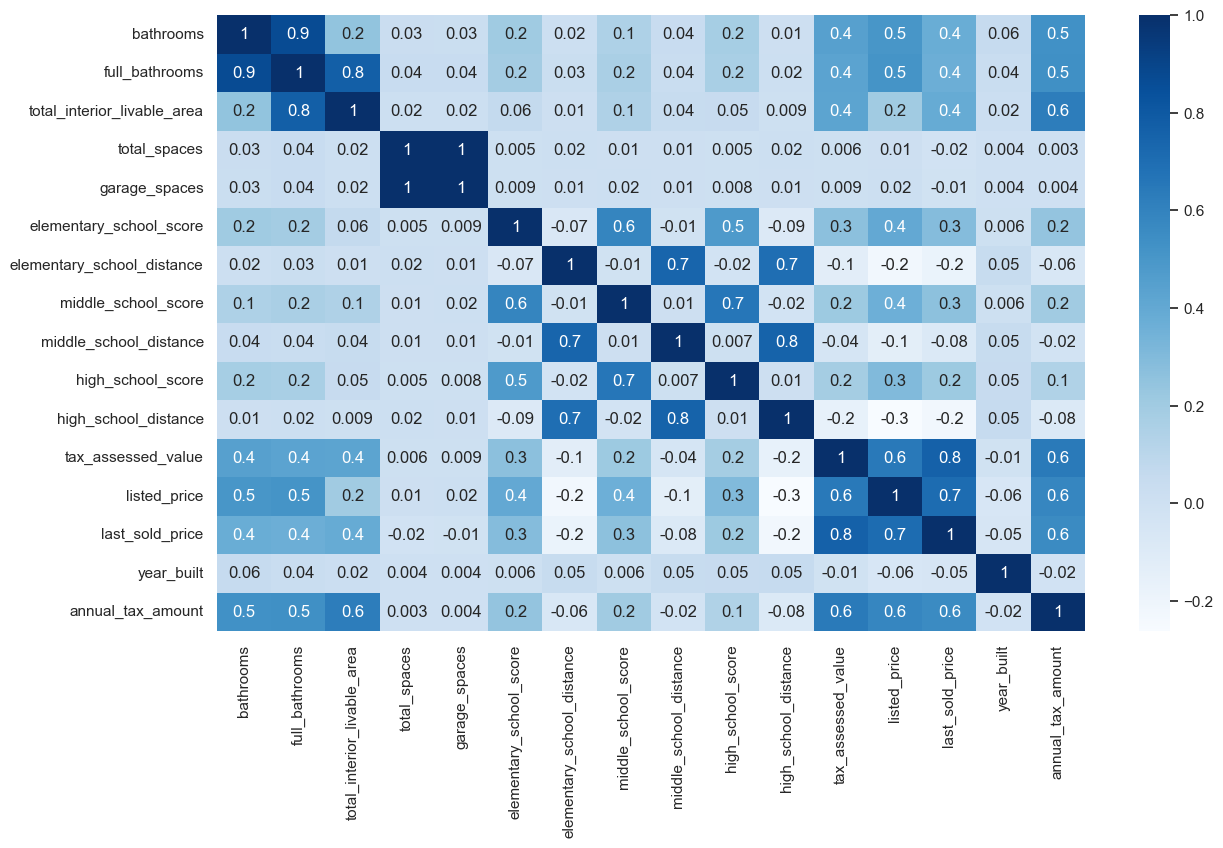

In [794]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_num.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [795]:
# corr_matrix = df_train.corr().abs()

# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

# df_num.drop(to_drop, axis=1, inplace=True)
# df_train_num.drop(to_drop, axis=1, inplace=True)
# df_test_num.drop(to_drop, axis=1, inplace=True)

In [796]:
df_train_num.shape, len(numeric_cols)

((34999, 16), 16)

## Label Encoding

In [797]:
def lc_encode(db):
    encoder = LabelEncoder()
    for series in db:
        if db[series].dtype == 'object':
            db[series] = encoder.fit_transform(db[series])
    return db

In [798]:
train_num_df.shape

(35000, 16)

In [799]:

# get numeric data
train_num_df = df_train_num.fillna(df_train[numeric_cols].mean(axis=0))
test_num_df = df_test_num.fillna(df_test[numeric_cols].mean(axis=0))

# scaling
scaler = StandardScaler()
X_train_num_sc= scaler.fit_transform(train_num_df.values)
X_test_num_sc = scaler.fit_transform(test_num_df.values)

# pca = PCA(n_components=12)

# X_train_num_sc_pca = pca.fit_transform(X_train_num_sc)
# X_test_num_sc_pca = pca.fit_transform(X_test_num_sc)

# get cat data
X_train_cat = lc_encode(df_train[cat_cols]).values
X_test_cat = lc_encode(df_test[cat_cols]).values

# get address data
X_train_address = df_train[text_cols]['address'].values
X_test_address = df_test[text_cols]['address'].values

# get summary data
X_train_summary = df_train[text_cols]['summary'].values
X_test_summary = df_test[text_cols]['summary'].values

# get id data
X_train_id = df_train[id_cols].values
X_test_id = df_test[id_cols].values

# get Y data
Y_train = df_train[target_cols].values
Y_test = df_test[target_cols].values

/var/folders/9z/5ndbcw755rb1wnsbnzbmsm0r0000gn/T/ipykernel_16506/502673342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[series] = encoder.fit_transform(db[series])
/var/folders/9z/5ndbcw755rb1wnsbnzbmsm0r0000gn/T/ipykernel_16506/502673342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[series] = encoder.fit_transform(db[series])


## Training Word2Vec model for addresses and summaries

In [800]:
# import gensim.downloader as api
# wiki_model = api.load('glove-wiki-gigaword-100')

In [801]:
df_summary_tok = df['summary'].apply(lambda x: word_tokenize(x.lower()))
df_address_tok = df['address'].apply(lambda x: word_tokenize(x.lower()))

model_address = Word2Vec(df_address_tok.to_list(), 
                 vector_size=20,
                 min_count=1,
                 window=2).wv
model_summary = Word2Vec(df_summary_tok.to_list(), 
                 vector_size=150,
                 min_count=3,
                 window=5).wv

## TF-IDF for summaries

In [802]:
# tf_address = TfidfVectorizer(analyzer='word', stop_words = 'english', max_features=5)
tf_summary = TfidfVectorizer(analyzer='word', stop_words = 'english', max_features=150)

# tfidf_matrix_address = tf_address.fit(df['address'].values.tolist())
tfidf_matrix_summary = tf_summary.fit(df['summary'].values.tolist())

# tfidf_train_address = tf_address.transform(X_train_address.tolist())
# tfidf_test_address = tf_address.transform(X_test_address.tolist())

tfidf_train_summary = tf_summary.transform(X_train_summary.tolist())
tfidf_test_summary = tf_summary.transform(X_test_summary.tolist())

## Getting word2vec vector for comments

In [803]:
def get_review_embedding_new(*args):
    review = args[0]
    model = args[1]

    review_tok = word_tokenize(review.lower())
    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_vectors = [model[x] if x=='<' or x=='>' or model.has_index_for(x) else vector for x in review_tok]
    n = len(phrase_vectors)

    if len(args) == 2:
        vector = np.mean(phrase_vectors, axis=0)

    elif len(args) == 3:
        tfidf_values = args[2]
        if n != 0:
            for vec in phrase_vectors:
                w_vec = np.squeeze(np.array([vec_el*w for vec_el, w in zip(vec, tfidf_values.toarray())]))
                vector += w_vec
            vector /= n
        else:
            print(n, phrase_vectors, review)
    return vector

In [804]:
address_vectors_train = np.asarray([get_review_embedding_new(x, model_address) for x in X_train_address])
address_vectors_test = np.asarray([get_review_embedding_new(x, model_address) for x in X_test_address])

summary_vectors_train = np.asarray([get_review_embedding_new(x, model_summary, vec_tfidf[0]) for vec_tfidf, x in zip(tfidf_train_summary, X_train_summary)])
summary_vectors_test = np.asarray([get_review_embedding_new(x, model_summary, vec_tfidf[0]) for vec_tfidf, x in zip(tfidf_test_summary, X_test_summary)])

In [21]:
import bokeh
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
import umap
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):

    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

## Finding NaN values

In [806]:
address_vectors_test.shape

(2951, 20)

In [807]:
np.where(np.isnan(summary_vectors_train)), np.where(np.isnan(summary_vectors_test)),
np.where(np.isnan(address_vectors_train)), np.where(np.isnan(address_vectors_test))

((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

In [808]:
address_vectors_2d_train = umap.UMAP(n_neighbors=3).fit_transform(address_vectors_train)
summary_vectors_2d_train = umap.UMAP(n_neighbors=3).fit_transform(summary_vectors_train)

In [809]:
draw_vectors(summary_vectors_2d_train[::100, 0], summary_vectors_2d_train[::100, 1],
             phrase=[phrase[:200] for phrase in df_train['summary'][::100]],
             radius=20,)

figure(id='p7551', ...)

In [810]:
draw_vectors(address_vectors_2d_train[::10, 0], address_vectors_2d_train[::10, 1],
             phrase=[phrase[:200] for phrase in df_train['address'][::100]],
             radius=20,)

figure(id='p8009', ...)

## Concating data

In [811]:
X_train = np.concatenate([X_train_num_sc, summary_vectors_train], axis=1)
X_test = np.concatenate([X_test_num_sc, summary_vectors_test], axis=1)
X_train.shape, X_test.shape

((34999, 166), (2951, 166))

# Training models

## Random Forest Regressor

In [812]:
from sklearn.ensemble import RandomForestRegressor

In [813]:
X_train.shape, Y_train.shape

((34999, 166), (34999, 1))

In [814]:
regr = RandomForestRegressor(max_depth=20, n_estimators=250)
regr.fit(X_train, Y_train)

/var/folders/9z/5ndbcw755rb1wnsbnzbmsm0r0000gn/T/ipykernel_16506/1579275812.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, Y_train)


RandomForestRegressor(max_depth=20, n_estimators=250)

In [815]:
test_preds = regr.predict(X_test)
np.sqrt(mean_squared_error(Y_test, test_preds))

0.23154539877940095

## Others

In [816]:
lr_grid = {
    "alpha": np.logspace(-5, 3, 100)
}

lr_grid_searcher = GridSearchCV(Lasso(), lr_grid, cv=8, return_train_score=True, scoring="neg_root_mean_squared_error")
lr_grid_searcher.fit(X_train, Y_train)
lr_grid_searcher.best_estimator_,lr_grid_searcher.best_score_

/Users/litvan007/intro_ml_2022/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.800e+01, tolerance: 1.940e+00
  model = cd_fast.enet_coordinate_descent(
/Users/litvan007/intro_ml_2022/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+02, tolerance: 1.925e+00
  model = cd_fast.enet_coordinate_descent(
/Users/litvan007/intro_ml_2022/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

In [ ]:
best_model = lr_grid_searcher.best_estimator_
best_model.fit(X_train, Y_train)

test_preds = best_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, test_preds))

0.5426848482600192

## Part 2. Clustering [8 points]

In this part we will try to analyze a dump of leaked passwords of internet users. It can be accessed here: https://github.com/ignis-sec/Pwdb-Public/tree/master/wordlists

First kind reminder - if you see your password in this base, change it immediately.

In [6]:
words = []
with open("ignis-1M.txt", "r") as file:
    for line in file:
        words.append(line.strip())

To make it more simple, we'll use only first 3K of passwords:

In [7]:
words = np.array(words[:3000]).reshape((-1, 1))

**Task 2.1 [0.5 point]**

Let's start with calculating levenshtein distance between words in the dataset. Compute a `3000x3000` distance matrix.

In [5]:
import numpy as np
from pylev import levenshtein
import matplotlib.pyplot as plt

In [8]:
X = np.zeros((words.shape[0], words.shape[0]))

for i, word_1 in enumerate(words):
    for j, word_2 in enumerate(words):
        X[i][j] = levenshtein(word_1[0], word_2[0])

X

array([[ 0.,  3.,  8., ...,  3.,  9., 12.],
       [ 3.,  0.,  9., ...,  6.,  9., 12.],
       [ 8.,  9.,  0., ...,  9.,  7., 11.],
       ...,
       [ 3.,  6.,  9., ...,  0.,  8., 12.],
       [ 9.,  9.,  7., ...,  8.,  0., 11.],
       [12., 12., 11., ..., 12., 11.,  0.]])

In [9]:
np.unique(X.reshape(-1))

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

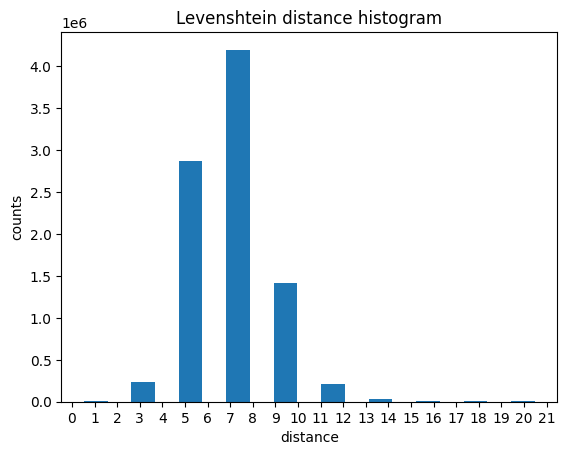

In [10]:
plt.hist(X.reshape(-1), rwidth=0.5)
plt.xticks(np.arange(0, X.max() + 1))
plt.xlabel('distance')
plt.ylabel('counts')
plt.title('Levenshtein distance histogram')
plt.show()

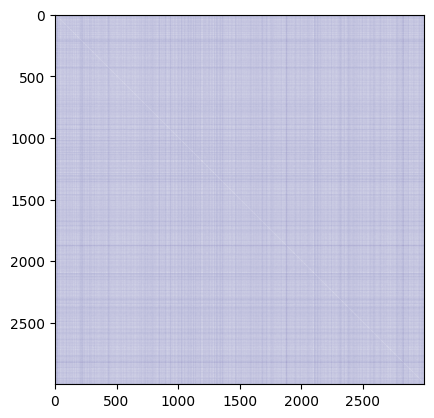

In [11]:
plt.imshow(X, cmap="Purples")
plt.show()

**Task 2.2 [1.5 point]** First algorithm we'll use is `DBSCAN`.

We have to adjust two parameters:
- `eps`
- `min_samples`

Grid-search these two parameters and report number and sizes of output clusters for every pair of parameters. 

**Note**: to define an appropriate space for each parameter remember what they mean and how they affect DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

Example:

In [13]:
eps = 3.0
min_samples = 3

db = DBSCAN(metric="precomputed", min_samples=min_samples, eps=eps).fit(X)
labels = db.labels_
len(set(labels))

7

In [14]:
from collections import Counter
def dbscan_grid_search(data, eps_space = 0.5,
                       min_samples_space = 5, min_clust = 0, max_clust = 10):
    set_of_parameters = []
    cluster_count = []

    for eps_val in eps_space:
        for samples_val in min_samples_space:
            dbscan_grid = DBSCAN(metric="precomputed", eps=eps_val, min_samples=samples_val).fit(data)
            clusters = dbscan_grid.labels_
            n_clusters = len(np.unique(clusters))

            if n_clusters >= min_clust and n_clusters <= max_clust:
                return [eps_val, samples_val, n_clusters], clusters

**Task 2.3 [1 point]** Choose a set of parameters that leads to 20-25 clusters.

- Is there a cluster that is significantly larger than the others? 
- How would you describe these clusters, what kind of passwords they contain? 

Use small samples from each cluster and try to describe a relevant password pattern.

**Chosing set of parameters**

In [15]:
set_of_parameters, cluster_count = dbscan_grid_search(X, np.arange(1, 10), np.arange(1, 10), 20, 25)
set_of_parameters

[1, 5, 22]

**Yes, the -1 (outliers) significantly larger than others**

In [16]:
dict(Counter(cluster_count))

{0: 76,
 1: 16,
 2: 12,
 -1: 2738,
 3: 15,
 4: 4,
 5: 5,
 6: 5,
 7: 7,
 8: 8,
 9: 6,
 10: 9,
 11: 6,
 12: 5,
 19: 5,
 13: 5,
 14: 5,
 15: 5,
 16: 14,
 17: 19,
 18: 8,
 20: 27}

In [17]:
cluster_count[0], cluster_count[1], cluster_count[20], cluster_count[26]

(0, 0, -1, -1)

In [18]:
X[0], words[0], X[1], words[1], X[20], words[20], X[26], words[26],

(array([ 0.,  3.,  8., ...,  3.,  9., 12.]),
 array(['123456'], dtype='<U21'),
 array([ 3.,  0.,  9., ...,  6.,  9., 12.]),
 array(['123456789'], dtype='<U21'),
 array([11., 11.,  9., ..., 11., 10., 12.]),
 array(['yuantuo2012'], dtype='<U21'),
 array([ 5.,  8.,  8., ...,  8.,  9., 12.]),
 array(['666666'], dtype='<U21'))

**The data was decomposed into a close password by the Levenshtein distance. But the parameters of the models were chosen in such a way that the set of passwords is not in any cluster**

**Task 2.4 [1 point]** 

Let's try to improve clustering by introducing a custome levenshtein distance. You might have noticed that there are some specific password generation patterns, like `qwerty -> qwerty123`.

Classic levenshtein distance for these two passwords is 3. Try to define a custom levenshtein distance that would make these passwords closer.

Feel free to experiment and create as complex levenshtein distance as you would like.

Report new clustering, describe new clusters.


In [19]:
#!pip3 install -U strsimpy

Example:

In [20]:
from strsimpy.weighted_levenshtein import WeightedLevenshtein


def insertion_cost(char):
    return 1.0


def deletion_cost(char):
    return 1.0


def substitution_cost(char_a, char_b):
    if (char_a, char_b) == ('t', 'r') or (char_a, char_b) == ('r', 't'):
        return 0.5
    return 1.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [21]:
print(levenshtein('Stting1', 'String1'))
print(weighted_levenshtein.distance('Stting1', 'String1'))

1
0.5


My example:

In [22]:
def my_insertion_cost(char):
    try: 
        int(char)
        return 1.0/10

    except:
        return 1.0


def my_deletion_cost(char):
    try: 
        int(char)
        return 1.0/10

    except:
        return 1.0


def my_substitution_cost(char_a, char_b):
    # subs_list = [('r', 't'), ('t', 'r')]
    # if (char_a, char_b) in subs_list:
    #     return 0.2
    return np.abs(ord(char_a) - ord(char_b))

my_weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=my_substitution_cost,
    insertion_cost_fn=my_insertion_cost,
    deletion_cost_fn=my_deletion_cost)

In [23]:
ord('k'), ord('n')

(107, 110)

In [24]:
print(levenshtein('Stting1', 'String1'))
print(my_weighted_levenshtein.distance('Sttikg', 'String1'))

1
4.1


In [25]:
print(levenshtein('qwerty', 'qwerty123'))
print(my_weighted_levenshtein.distance('qwerty', 'qwerty123'))

3
0.30000000000000004


**Task 2.5 [1 point]** Hierarchical Agglomerative clustering

It is time to draw some pictures. 
- apply agglomerative clustering algorithm to form 5-10 clusters
- plot a dendrogram
- describe output clusters

In [15]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

from collections import Counter

Compute dendrogram:

In [16]:
condensed_X = pdist(X)
linkage = hierarchy.linkage(condensed_X,  method='average')

Plot it:

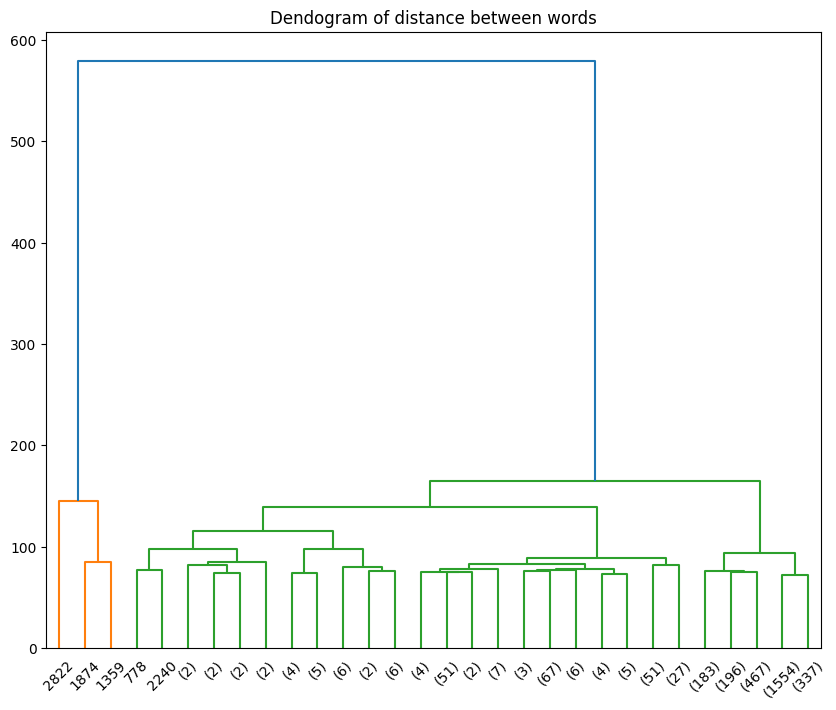

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

hierarchy.dendrogram(linkage, truncate_mode='lastp', ax=ax)
plt.title('Dendogram of distance between words')
plt.show()

Compute clusters:

In [23]:
cluster = AgglomerativeClustering(n_clusters=10).fit(X)
labels = cluster.labels_
labels

/Users/litvan007/intro_ml_2022/.venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([4, 5, 3, ..., 5, 8, 2])

Describe them in any form:

In [24]:
import umap

words_2d = umap.UMAP(n_neighbors=10).fit_transform(X)

In [25]:
colors = list(map(lambda x: bokeh.colors.named.__all__[x+30], labels))

In [26]:
draw_vectors(words_2d[:, 0], words_2d[:, 1],
             phrase=[word for word in words],
             radius=15, color=colors)

figure(id='p1005', ...)

### K-Means
This clustering algorithm doesn't work with precomputed distances, as it has to calculate centroids and measure distance from a centroid to every object.

Thus, we need to map the dataset to some vector space. How? Embeddings of course

In [27]:
import gensim.downloader

In [28]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [30]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

**Task 2.6 [1 point]** 

- Create two lists - for those passwords that can be embedded and for their embeddings correspondigly
- How many passwords have embeddings? 
- Describe the passwords that have embeddings and those that don't. Give your reasoning why these groups are formed like this.


In [33]:
from tqdm import tqdm
all_embeds = list(word_embeddigs.key_to_index.keys())
words_w_embeddings = [word[0] for word in tqdm(words) if word[0] in all_embeds]
embeddings = [word_embeddings[x[0]] for x in words_w_embeddings]

assert len(words_w_embeddings) == len(embeddings)

100%|██████████| 3000/3000 [00:23<00:00, 127.36it/s]


In [36]:
len(words_w_embeddings)

1794

**Task 2.7 [2 point]** K-MEANS

- Run kmeans with different parameters, for every set of parameters report average in-class, out-class distance
- Remember that k-means has stochasticity, thus two algorithms with same hyperparameters can give different results
- Chose several (3-5) your favorite k-means versions, visualize clusters in 2D using PCA or TSNE
- Describe what are the clusters that kmeans can detect
- Are they different from DBSCAN? Why?

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Example:

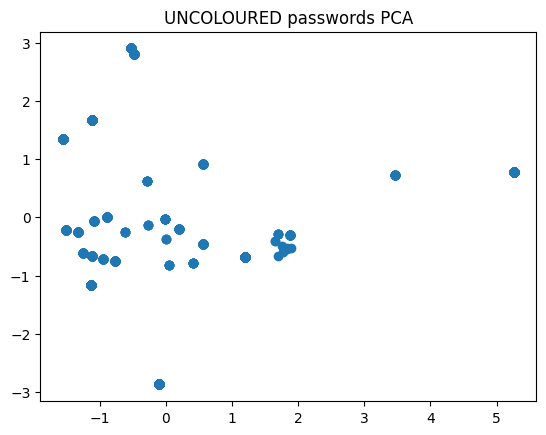

In [59]:
embeddings_clusters = KMeans(n_clusters=3).fit_predict(embeddings)
    

pca = PCA(n_components=2)
pca_words = pca.fit_transform(embeddings)

plt.scatter(pca_words[:, 0], pca_words[:, 1])
plt.title("UNCOLOURED passwords PCA") # YOU HAVE TO PLOT IT WITH COLORS
plt.show()

My examples:

In [91]:
def average_distance(X, labels, type='in'):
    data = np.concatenate([X, np.expand_dims(labels, axis=1)], axis=1)
    averages_list = []
    if type == 'in':
        for mark in labels:
            data_temp = data[np.where(data[:, -1] == mark)]
            averages_list.append(pdist(data_temp).mean())
        return sum(averages_list)/len(averages_list)

    elif type == 'out':
        for mark in labels:
            data_temp = data[np.where(data[:, -1] != mark)]
            averages_list.append(pdist(data_temp).mean())
        return sum(averages_list)/len(averages_list)

In [101]:
from sklearn.model_selection import ParameterGrid

param_grid = {'n_clusters': [4, 6, 8, 10, 12],
              'init': ['k-means++'],
              'max_iter': [100, 200, 300]}

grid = ParameterGrid(param_grid)

for i, params in enumerate(grid):
    model_kms = KMeans(**params)
    embeddings_clusters = model_kms.fit_predict(embeddings)
    
    print(f"Kmeans model: {i+1}\nparams: {params}")
    
    colors = list(map(lambda x: bokeh.colors.named.__all__[x+30], embeddings_clusters))
    X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=100).fit_transform(np.array(embeddings))
    draw_vectors(X_embedded[:, 0], X_embedded[:, 1],
             phrase=[word for word in words_w_embeddings],
             radius=15, color=colors)
    
    print(f"Average in-class distance:{average_distance(np.array(embeddings), embeddings_clusters)}, out-class distance {average_distance(np.array(embeddings), embeddings_clusters, type='out')}")
    print(f"{'_'*83}")

Kmeans model: 1
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4}


Average in-class distance:3.857760889330204, out-class distance 5.365833998819223
___________________________________________________________________________________
Kmeans model: 2
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6}


Average in-class distance:2.9386500689074353, out-class distance 5.684043587026286
___________________________________________________________________________________
Kmeans model: 3
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 8}


Average in-class distance:2.3958999839446387, out-class distance 6.068110364661039
___________________________________________________________________________________
Kmeans model: 4
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 10}


Average in-class distance:1.9777295472622112, out-class distance 6.244429968666505
___________________________________________________________________________________
Kmeans model: 5
params: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 12}


Average in-class distance:1.5250234321163703, out-class distance 6.661937983628307
___________________________________________________________________________________
Kmeans model: 6
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 4}


Average in-class distance:3.857142870541359, out-class distance 5.274241629606374
___________________________________________________________________________________
Kmeans model: 7
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 6}


Average in-class distance:2.9258978510091067, out-class distance 5.666621569690017
___________________________________________________________________________________
Kmeans model: 8
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 8}


Average in-class distance:2.3928638655142525, out-class distance 6.031320995984998
___________________________________________________________________________________
Kmeans model: 9
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 10}


Average in-class distance:1.9525203278861791, out-class distance 6.2504307486964334
___________________________________________________________________________________
Kmeans model: 10
params: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 12}


Average in-class distance:1.6034105287291593, out-class distance 6.457986390476873
___________________________________________________________________________________
Kmeans model: 11
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4}


Average in-class distance:3.931167589543537, out-class distance 5.389300886059788
___________________________________________________________________________________
Kmeans model: 12
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 6}


Average in-class distance:2.9386500689074353, out-class distance 5.779347974016972
___________________________________________________________________________________
Kmeans model: 13
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 8}


Average in-class distance:2.370186346042069, out-class distance 6.082978006586405
___________________________________________________________________________________
Kmeans model: 14
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10}


Average in-class distance:1.901898610306086, out-class distance 6.580669387007998
___________________________________________________________________________________
Kmeans model: 15
params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 12}


Average in-class distance:1.6502338574888014, out-class distance 6.83791493159269
___________________________________________________________________________________
Kmeans model: 16
params: {'init': 'k-means++', 'max_iter': 400, 'n_clusters': 4}


Average in-class distance:3.857142870541359, out-class distance 5.221294393433773
___________________________________________________________________________________
Kmeans model: 17
params: {'init': 'k-means++', 'max_iter': 400, 'n_clusters': 6}


Average in-class distance:2.9090233425833216, out-class distance 5.716754219290661
___________________________________________________________________________________
Kmeans model: 18
params: {'init': 'k-means++', 'max_iter': 400, 'n_clusters': 8}


Average in-class distance:2.3789644877681093, out-class distance 6.0228351195923615
___________________________________________________________________________________
Kmeans model: 19
params: {'init': 'k-means++', 'max_iter': 400, 'n_clusters': 10}


Average in-class distance:1.9935947755365357, out-class distance 6.667490364267012
___________________________________________________________________________________
Kmeans model: 20
params: {'init': 'k-means++', 'max_iter': 400, 'n_clusters': 12}


Average in-class distance:1.6009291015307894, out-class distance 6.640220755294872
___________________________________________________________________________________
Kmeans model: 21
params: {'init': 'random', 'max_iter': 100, 'n_clusters': 4}


Average in-class distance:3.888609315603628, out-class distance 5.387729893036723
___________________________________________________________________________________
Kmeans model: 22
params: {'init': 'random', 'max_iter': 100, 'n_clusters': 6}


Average in-class distance:3.3393998196439583, out-class distance 5.801116342621989
___________________________________________________________________________________
Kmeans model: 23
params: {'init': 'random', 'max_iter': 100, 'n_clusters': 8}


Average in-class distance:2.639648852263415, out-class distance 5.9320650392528975
___________________________________________________________________________________
Kmeans model: 24
params: {'init': 'random', 'max_iter': 100, 'n_clusters': 10}


Average in-class distance:2.4096550976370397, out-class distance 6.232757299320569
___________________________________________________________________________________
Kmeans model: 25
params: {'init': 'random', 'max_iter': 100, 'n_clusters': 12}


KeyboardInterrupt: 

* Kmeans minimizes the total squared errors of distances between data points and cluster centers. Each cluster contains data that is very similar in metric, as far as the specified number of clusters allows. For example, in one of the clusters there may be words such as *`piglet`, `pipmin`, `puppies` and so on*. Obviously, kmens most passwords in each class will started with the same letter

* Yes, the clustering results of kmeans and dbscan will be different, because dbscan can put outliers in a separate cluster (-1). Despite the fact that if we find the optimal dbscan parameters and get the same number of clusters as in kmeans, the result may be different because the extreme points in each kmeans cluster are outliers in dbscan clusters

**Task 2.8 [extra points]**

Here are some ideas how to experiment:
- compare performance of algorithms with levenshtein distance and embeddings
- use algorithms that were mentioned in the lecture, but with no explanation. In this section write a brief description of an algorithm before applying it

In [ ]:
# YOUR CODE HERE